In [1]:
!pip install datasets

     ---------------------------------------- 0.0/66.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/66.9 kB ? eta -:--:--
     ------------------------------------ --- 61.4/66.9 kB 3.2 MB/s eta 0:00:01
     ---------------------------------------- 66.9/66.9 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/480.6 kB ? eta -:--:--
    --------------------------------------- 10.2/480.6 kB ? eta -:--:--
    --------------------------------------- 10.2/480.6 kB ? eta -:--:--
   -- ------------------------------------ 30.7/480.6 kB 217.9 kB/s eta 0:00:03
   --- ----------------------------------- 41.0/480.6 kB 245.8 kB/s eta 0:00:02
   ---- ---------------------------------- 61.4/480.6 kB 297.7 kB/s eta 0:00:02
   ------ -------------------------------- 81.9/480.6 kB 327.3 kB/s eta 0:00:02
   ------- ------------------------------- 92.2/480.6 kB 308.0 kB/s eta 0:00:02
   -------- ----------------------------- 112.6/480.6 kB 327.2 kB/s eta 0:00:02
 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_fscore_support
from datasets import load_dataset

from huggingface_hub import list_datasets

datasets_list = list_datasets()
# print("Number of available datasets: ", len(datasets_list))
print([dataset.id for dataset in datasets_list if ("hate" in dataset.id )])
# Number of available datasets:  1084
print("Available datasets:")
# Available datasets:
print(datasets_list)
# [ A very long list that includes "tweets_hate_speech_detection" dataset ]

['tdavidson/hate_speech_offensive', 'inmoonlight/kor_hate', 'Paul/hatecheck', 'SetFit/hate_speech_offensive', 'limjiayi/hateful_memes_expanded', 'ucberkeley-dlab/measuring-hate-speech', 'cardy/kohatespeech', 'mapsoriano/2016_2022_hate_speech_filipino', 'vedanta2003/hateds', 'manueltonneau/spanish-hate-speech-superset', 'manueltonneau/english-hate-speech-superset', 'TUKE-KEMT/hate_speech_slovak', 'mlburnham/hatespeech_entailment', 'simbolo-ai/burmese-hatespeech', 'jackyhate/text-to-image-2M', 'FrancophonIA/multilingual-hatespeech-dataset', 'rezacsedu/bn_hate_speech', 'legacy-datasets/hate_offensive', 'odegiber/hate_speech18', 'legacy-datasets/hate_speech_filipino', 'community-datasets/hate_speech_pl', 'hate-speech-portuguese/hate_speech_portuguese', 'Hate-speech-CNERG/hatexplain', 'tweets-hate-speech-detection/tweets_hate_speech_detection', 'AI-it/korean-hate-speech', 'DDSC/dkhate', 'SetFit/hate_speech18', 'classla/FRENK-hate-en', 'classla/FRENK-hate-hr', 'classla/FRENK-hate-sl', 'valur

In [ ]:
train_ds, test_ds = load_dataset("tweets_hate_speech_detection", split=['train[:80%]', 'train[-20%:]'])
train_ds, test_ds

# outputs:
# (Dataset({
#     features: ['label', 'tweet'],
#     num_rows: 25570
# }), Dataset({
#     features: ['label', 'tweet'],
#     num_rows: 6392
# }))

README.md:   0%|          | 0.00/5.58k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.07M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31962 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/17197 [00:00<?, ? examples/s]

(Dataset({
     features: ['label', 'tweet'],
     num_rows: 25570
 }),
 Dataset({
     features: ['label', 'tweet'],
     num_rows: 6392
 }))

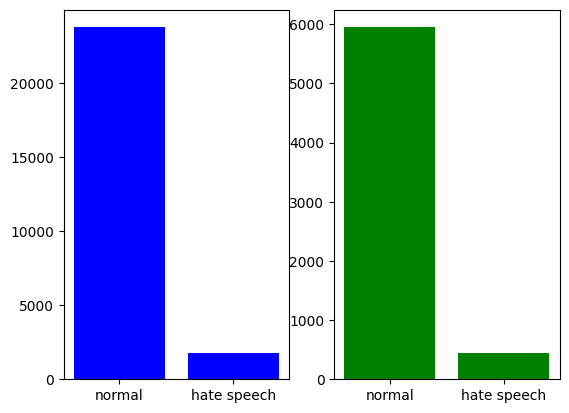

In [ ]:
labels_train = train_ds['label']
labels_test = test_ds['label']

hate_labels_train = sum(labels_train)
not_hate_labels_train = len(labels_train) - sum(labels_train)

hate_labels_test = sum(labels_test)
not_hate_labels_test = len(labels_test) - sum(labels_test)


fig, (ax1,ax2) = plt.subplots(1,2)

_ = ax1.bar(x=["normal", "hate speech"],
            height=[not_hate_labels_train, hate_labels_train],
            color='b')
_ = ax2.bar(x=["normal", "hate speech"],
            height=[not_hate_labels_test, hate_labels_test],
            color='g')

In [ ]:
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification,
                          Trainer,
                          TrainingArguments)

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
tokenize_func = lambda sentences: tokenizer(sentences['tweet'], \
                                            padding="max_length", \
                                            truncation=True)

tok_train_ds = train_ds.map(tokenize_func, batched=True)
tok_test_ds = test_ds.map(tokenize_func, batched=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/25570 [00:00<?, ? examples/s]

Map:   0%|          | 0/6392 [00:00<?, ? examples/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=2)


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# prompt: mode the above model to gpu

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Ensure your training data is also on the GPU
def move_to_device(batch):
    for k, v in batch.items():
        if isinstance(v, torch.Tensor):
            batch[k] = v.to(device)
    return batch

tok_train_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])
tok_test_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])



In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

In [ ]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tok_train_ds,
    eval_dataset=tok_test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()
# We are going to get multiple loss values on each training step here
trainer.evaluate()

Step,Training Loss
10,0.186700
20,0.133400
30,0.136200
40,0.109400
50,0.176400
60,0.103700
70,0.148200
80,0.113600
90,0.155600
100,0.105900


{'eval_loss': 0.12302514910697937,
 'eval_accuracy': 0.9826345431789737,
 'eval_f1': 0.8731428571428571,
 'eval_precision': 0.8842592592592593,
 'eval_recall': 0.8623024830699775,
 'eval_runtime': 95.9616,
 'eval_samples_per_second': 66.61,
 'eval_steps_per_second': 4.168,
 'epoch': 5.0}

In [ ]:
def predict_hate_speech(sentence):
  inputs = tokenizer(sentence, padding=True, truncation=True, return_tensors="pt")
  outputs = model(**inputs)
  predicted_class = outputs.logits.argmax(-1).item()
  return "Hate speech" if predicted_class == 1 else "Not hate speech"


In [ ]:
import os
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Assuming 'model' is your trained RobertaForSequenceClassification object
output_dir = "my_roberta_model"  # Choose your desired directory name
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save the model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model saved to {output_dir}")

Model saved to my_roberta_model


In [ ]:

# Example usage
sentence = "I hate you"
prediction = predict_hate_speech(sentence)
print(f"The sentence '{sentence}' is classified as: {prediction}")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [ ]:
from google.colab import files
files.download('/content')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/my_roberta_model/')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cd ..

/


In [ ]:
pwd

'/'

In [ ]:
!zip -r content.zip content/*

  adding: content/logs/ (stored 0%)
  adding: content/logs/events.out.tfevents.1730880319.1ac3aaa09e7d.966.1 (deflated 70%)
  adding: content/logs/events.out.tfevents.1730880067.1ac3aaa09e7d.966.0 (deflated 62%)
  adding: content/logs/events.out.tfevents.1730886254.1ac3aaa09e7d.966.2 (deflated 29%)
  adding: content/my_roberta_model/ (stored 0%)
  adding: content/my_roberta_model/model.safetensors (deflated 7%)
  adding: content/my_roberta_model/vocab.json (deflated 59%)
  adding: content/my_roberta_model/tokenizer.json (deflated 72%)
  adding: content/my_roberta_model/special_tokens_map.json (deflated 52%)
  adding: content/my_roberta_model/config.json (deflated 50%)
  adding: content/my_roberta_model/tokenizer_config.json (deflated 76%)
  adding: content/my_roberta_model/merges.txt (deflated 53%)
  adding: content/results/ (stored 0%)
  adding: content/results/checkpoint-7500/ (stored 0%)
  adding: content/results/checkpoint-7500/model.safetensors (deflated 7%)
  adding: content/resu

In [ ]:
ls

bin@                        datalab/  lib@     mnt/                      python-apt.tar.xz*  sys/
boot/                       dev/      lib32@   NGC-DL-CONTAINER-LICENSE  root/               tmp/
content/                    etc/      lib64@   opt/                      run/                tools/
content.zip                 home/     libx32@  proc/                     sbin@               usr/
cuda-keyring_1.0-1_all.deb  kaggle/   media/   python-apt/               srv/                var/


In [ ]:
# prompt: write command to know disk usage of a file

!du -sh content.zip

du: cannot access 'content.zip': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv /content/content.zip /content/drive/MyDrive/content/

In [ ]:
cd

/


In [ ]:
mkdir content

In [ ]:
ls /content/drive/MyDrive/content

content.zip


### Loading and running model

In [8]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer
import torch

# Load the model and tokenizer
hate_model_path = "./my_roberta_model" 
hate_model = RobertaForSequenceClassification.from_pretrained(hate_model_path)
hate_tokenizer = RobertaTokenizer.from_pretrained(hate_model_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hate_model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

In [9]:
def predict_hate_speech(sentence):
    inputs = hate_tokenizer(sentence, padding=True, truncation=True, return_tensors="pt").to(device)
    outputs = hate_model(**inputs)
    predicted_class = outputs.logits.argmax(-1).item()
    return 1 if predicted_class == 1 else 0
    # return "Hate speech" if predicted_class == 1 else "Not hate speech"


In [10]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

spam_tokenizer = AutoTokenizer.from_pretrained("./roberta-spam")
spam_model = AutoModelForSequenceClassification.from_pretrained("./roberta-spam")

In [11]:
def predict_spam_speech(sentence):
    inputs = spam_tokenizer(sentence, padding=True, truncation=True, return_tensors="pt").to(device)
    outputs = spam_model(**inputs)
    predicted_class = outputs.logits.argmax(-1).item()    
    return 2 if predicted_class == 1 else 0
    # return "Spam" if predicted_class == 1 else "Not spam"

In [ ]:
sentence = "I "
# sentence = "you are a good person"
hate_predection = predict_hate_speech(sentence)
spam_prediction = predict_spam_speech(sentence)
if hate_predection+spam_prediction == 0:
    prediction = "Normal"
elif hate_predection+spam_prediction == 1:
    prediction = "Hate speech"
elif hate_predection+spam_prediction == 2:
    prediction = "Spam"
else:
    prediction = "Hate speech and Spam"
print(f"The sentence '{sentence}' is classified as: {prediction}")

The sentence 'click this link to win a million dollars ' is classified as: Spam
